In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Procesamiento de la información

In [86]:
data = pd.read_csv('C:\\Users\\pc_tesoreria1\\Desktop\\data.csv')
data.drop("Unnamed: 32", axis = 1, inplace = True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
# Descripcion de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
# Manejo de nulos
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [89]:
# Categorización del campo diagnosis
data["diagnosis"].replace(to_replace = "M", value = 1, inplace = True)
data["diagnosis"].replace(to_replace = "B", value = 0, inplace = True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
#Análisis del desbalanceo de los datos
data_imb = pd.DataFrame(data["diagnosis"].value_counts())
data_imb.reset_index(inplace=True)
data_imb.columns = ["diagnosis", "count"]
data_imb["percentage"] = (data_imb["count"] / data_imb["count"].sum()) * 100
data_imb


,diagnosis,count,percentage
0,0,357,62.741652
1,1,212,37.258348


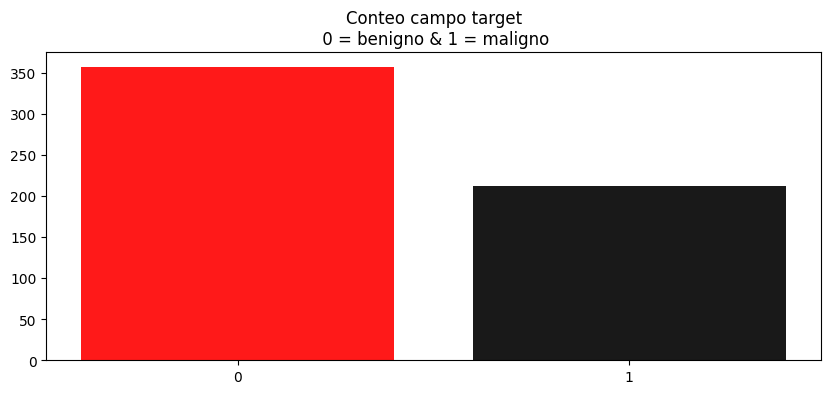

In [91]:
# Grafico de barras - conteo de estado
x = [str(data_imb["diagnosis"][0]), str(data_imb["diagnosis"][1])]
y = data_imb["count"]

plt.figure(figsize=(10, 4))

plt.bar(x, y, color=["red", "black"], alpha=0.9)
plt.title("Conteo campo target\n 0 = benigno & 1 = maligno")

plt.show()


Balance de datos

In [92]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
processed_data = data.copy()
undersample = RandomUnderSampler(random_state = 7)
X = processed_data.drop("diagnosis", axis = 1)
y = processed_data["diagnosis"]
X_over, y_over = undersample.fit_resample(X, y)
y_over = pd.DataFrame(y_over.value_counts())
y_over = y_over.reset_index()
y_over

,diagnosis,count
0,0,212
1,1,212


Escalamiento de los datos

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
processed_scaled_data = scaler.fit_transform(processed_data)
processed_scaled_data = pd.DataFrame(processed_scaled_data)
processed_scaled_data.columns = processed_data.columns
processed_scaled_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Modelo Logistic Regression

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

X = processed_scaled_data.drop("diagnosis", axis = 1)
y = processed_scaled_data["diagnosis"].values

#  Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7, shuffle = True)
model = LogisticRegression()
result = model.fit(X_train, y_train)

print('\033[91m' + 'Test' + '\033[0m')
prediction_test = model.predict(X_test)
print(f'Recall Score : {recall_score(y_test, prediction_test)}')
print(f'Accuracy Socre : {accuracy_score(y_test, prediction_test)}')
print(f'Precision Score : {precision_score(y_test, prediction_test)}')


print('\033[93m' + 'Train' + '\033[0m')
prediction_train = model.predict(X_train)
print(f'Recall Score : {recall_score(y_train, prediction_train)}')
print(f'Accuracy Socre : {accuracy_score(y_train, prediction_train)}')
print(f'Precision Score : {precision_score(y_train, prediction_train)}')

Test
Recall Score : 0.9
Accuracy Socre : 0.9649122807017544
Precision Score : 1.0
Train
Recall Score : 0.9127906976744186
Accuracy Socre : 0.9648351648351648
Precision Score : 0.9936708860759493


In [95]:
from sklearn.metrics import classification_report
print('\033[91m' + 'Test' + '\033[0m')
print(classification_report(y_test, prediction_test, target_names = ["benign", "malignant"]))
print('\033[93m' + 'Train' + '\033[0m')
print(classification_report(y_train, prediction_train, target_names = ["benign", "malignant"]))

Test
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        74
   malignant       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Train
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97       283
   malignant       0.99      0.91      0.95       172

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.97      0.96      0.96       455



Matriz de Confusión para el conjunto de entrenamiento:
[[282   1]
 [ 15 157]]
Matriz de Confusión para el conjunto de prueba:
[[74  0]
 [ 4 36]]


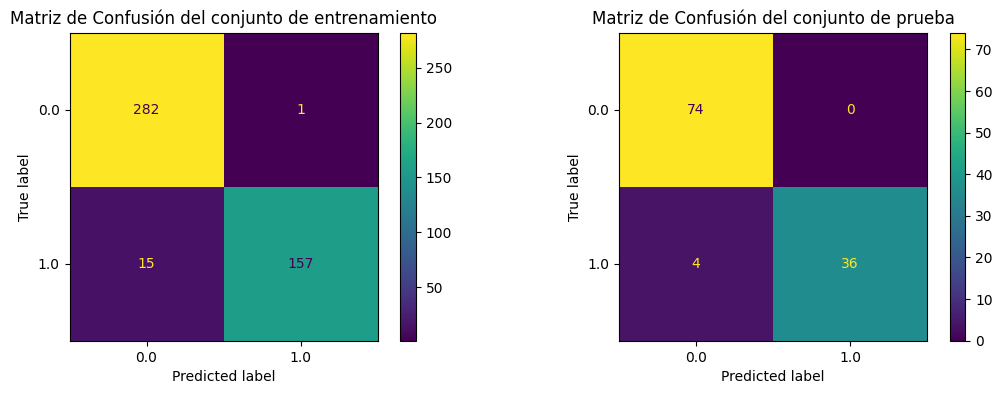

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz de confusión para el conjunto de entrenamiento y prueba
train_conf_matrix = confusion_matrix(y_train, model.predict(X_train))
test_conf_matrix = confusion_matrix(y_test, prediction_test)

# Mostrar la matriz de confusión para el conjunto de entrenamiento
print("Matriz de Confusión para el conjunto de entrenamiento:")
print(train_conf_matrix)

# Mostrar la matriz de confusión para el conjunto de prueba
print("Matriz de Confusión para el conjunto de prueba:")
print(test_conf_matrix)

# Visualizar la matriz de confusión para el conjunto de entrenamiento
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix, display_labels=model.classes_)
disp_train.plot(ax=axs[0], cmap="viridis")
axs[0].set_title("Matriz de Confusión del conjunto de entrenamiento")

# Visualizar la matriz de confusión para el conjunto de prueba
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=model.classes_)
disp_test.plot(ax=axs[1], cmap="viridis")
axs[1].set_title("Matriz de Confusión del conjunto de prueba")

plt.show()


Modelo árbol de decisión

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

train_scores, test_scores = list(), list()
max_depths = [i for i in range(1, 40)]

for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    
    train_yhat = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

best_max_depth = max_depths[test_scores.index(max(test_scores))]

dtc = DecisionTreeClassifier(max_depth=best_max_depth)
dtc.fit(X_train, y_train)

print('\033[91m' + 'Test' + '\033[0m')
prediction_test_dtc = dtc.predict(X_test)
print(f'Recall Score : {recall_score(y_test, prediction_test_dtc)}')
print(f'Accuracy Score : {accuracy_score(y_test, prediction_test_dtc)}')
print(f'Precision Score : {precision_score(y_test, prediction_test_dtc)}')

print('\033[93m' + 'Train' + '\033[0m')
prediction_train_dtc = dtc.predict(X_train)
print(f'Recall Score : {recall_score(y_train, prediction_train_dtc)}')
print(f'Accuracy Score : {accuracy_score(y_train, prediction_train_dtc)}')
print(f'Precision Score : {precision_score(y_train, prediction_train_dtc)}')

print('\033[91m' + 'Test' + '\033[0m')
print(classification_report(y_test, prediction_test_dtc, target_names=["benign", "malignant"]))
print('\033[93m' + 'Train' + '\033[0m')
print(classification_report(y_train, prediction_train_dtc, target_names=["benign", "malignant"]))

dtc = DecisionTreeClassifier(max_depth = 40)
dtc.fit(X_train, y_train)


Test
Recall Score : 0.875
Accuracy Score : 0.9298245614035088
Precision Score : 0.9210526315789473
Train
Recall Score : 1.0
Accuracy Score : 1.0
Precision Score : 1.0
Test
              precision    recall  f1-score   support

      benign       0.93      0.96      0.95        74
   malignant       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Train
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       283
   malignant       1.00      1.00      1.00       172

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



DecisionTreeClassifier(max_depth=40)

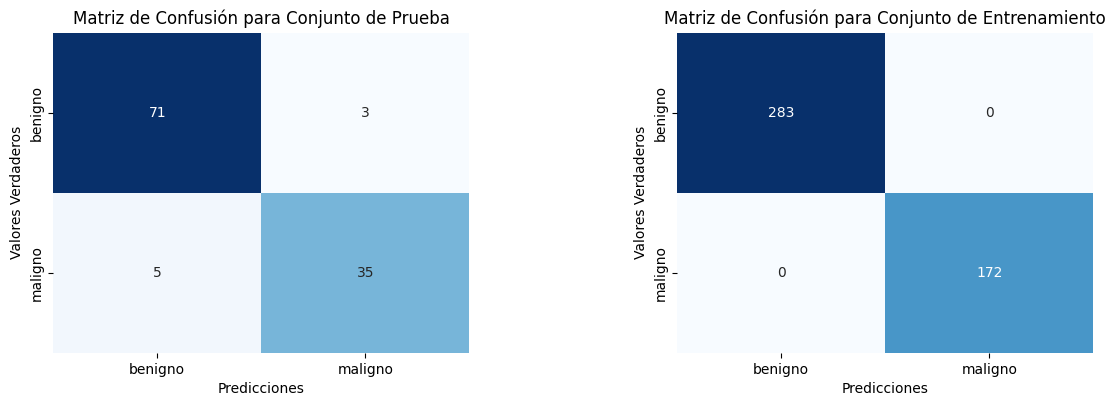

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y las subtramas
fig, axs = plt.subplots(1, 2, figsize=(13, 4), gridspec_kw={'wspace': 0.5})

# Para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, prediction_test_dtc)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["benigno", "maligno"], yticklabels=["benigno", "maligno"], ax=axs[0])
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Valores Verdaderos')
axs[0].set_title('Matriz de Confusión para Conjunto de Prueba')

# Para el conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_train, prediction_train_dtc)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["benigno", "maligno"], yticklabels=["benigno", "maligno"], ax=axs[1])
axs[1].set_xlabel('Predicciones')
axs[1].set_ylabel('Valores Verdaderos')
axs[1].set_title('Matriz de Confusión para Conjunto de Entrenamiento')

plt.subplots_adjust(wspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajustar los márgenes
plt.show()



Modelo Radom forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
max_depths = [i for i in range(1, 40)]

for i in max_depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    
    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

best_max_depth = max_depths[test_scores.index(max(test_scores))]

rf = RandomForestClassifier(max_depth=best_max_depth)
rf.fit(X_train, y_train)

print('\033[91m' + 'Test' + '\033[0m')
prediction_test_rf = rf.predict(X_test)
print(f'Recall Score : {recall_score(y_test, prediction_test_rf)}')
print(f'Accuracy Score : {accuracy_score(y_test, prediction_test_rf)}')
print(f'Precision Score : {precision_score(y_test, prediction_test_rf)}')

print('\033[93m' + 'Train' + '\033[0m')
prediction_train_rf = rf.predict(X_train)
print(f'Recall Score : {recall_score(y_train, prediction_train_rf)}')
print(f'Accuracy Score : {accuracy_score(y_train, prediction_train_rf)}')
print(f'Precision Score : {precision_score(y_train, prediction_train_rf)}')

print('\033[91m' + 'Test' + '\033[0m')
print(classification_report(y_test, prediction_test_rf, target_names=["benign", "malignant"]))
print('\033[93m' + 'Train' + '\033[0m')
print(classification_report(y_train, prediction_train_rf, target_names=["benign", "malignant"]))


Test
Recall Score : 0.95
Accuracy Score : 0.9824561403508771
Precision Score : 1.0
Train
Recall Score : 1.0
Accuracy Score : 1.0
Precision Score : 1.0
Test
              precision    recall  f1-score   support

      benign       0.97      1.00      0.99        74
   malignant       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

Train
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       283
   malignant       1.00      1.00      1.00       172

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



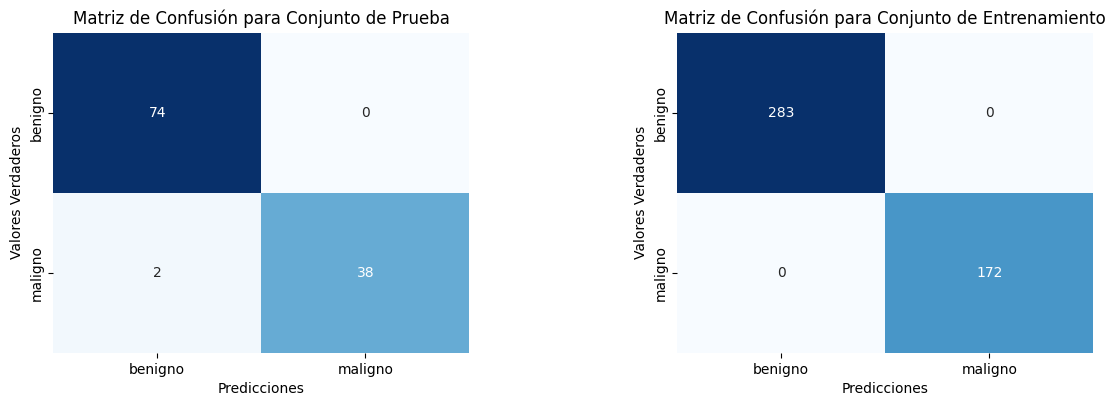

In [100]:
# Matriz de Confusión para el conjunto de prueba
conf_matrix_test_rf = confusion_matrix(y_test, prediction_test_rf)

# Matriz de Confusión para el conjunto de entrenamiento
conf_matrix_train_rf = confusion_matrix(y_train, prediction_train_rf)

# Crear la figura y las subtramas con un espacio horizontal entre ellas
fig, axs = plt.subplots(1, 2, figsize=(13, 4), gridspec_kw={'wspace': 0.5})

# Graficar la matriz de confusión para el conjunto de prueba en la primera subtrama
sns.heatmap(conf_matrix_test_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["benigno", "maligno"], yticklabels=["benigno", "maligno"], ax=axs[0])
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Valores Verdaderos')
axs[0].set_title('Matriz de Confusión para Conjunto de Prueba')

# Graficar la matriz de confusión para el conjunto de entrenamiento en la segunda subtrama
sns.heatmap(conf_matrix_train_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["benigno", "maligno"], yticklabels=["benigno", "maligno"], ax=axs[1])
axs[1].set_xlabel('Predicciones')
axs[1].set_ylabel('Valores Verdaderos')
axs[1].set_title('Matriz de Confusión para Conjunto de Entrenamiento')

# Ajustar los márgenes de la figura para evitar la superposición de ejes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()
